In [ ]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [ ]:
image_matrix = cv2.imread("noiseIm.jpg", 0)
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])


K = 0.01

def constrained_ls_filter(img, kernel, laplacian, gamma):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = np.fft.fftshift(np.fft.fft2(dummy))
    kernel = np.fft.fftshift(np.fft.fft2(kernel, s=img.shape))
    P = np.fft.fftshift(np.fft.fft2(laplacian, s=img.shape))
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + gamma * P)
    dummy = dummy * kernel
    dummy = np.abs(np.fft.ifft2(np.fft.ifftshift(dummy)))
    return dummy

In [ ]:
len(image_matrix)

256

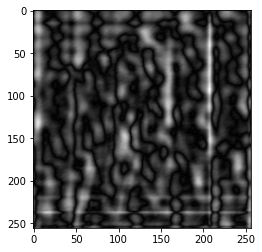

In [ ]:
final_img = constrained_ls_filter(image_matrix, kernel, laplacian, K)
plt.imshow(final_img, cmap="gray")
plt.show()

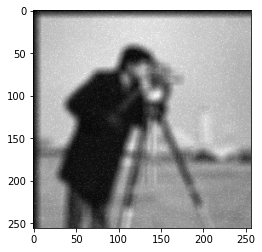

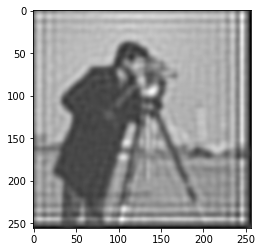

16.586036907342738


In [ ]:
def generate_padded_matrix(matrix, dimension):
    m,n = matrix.shape
    padded_matrix = np.zeros((dimension, dimension))
    padded_matrix[:m,:n] = matrix
    return padded_matrix
def get_psnr(matrix, final_matrix):
    b = (len(matrix) - 1)**2
    mse = np.sum(np.square(final_matrix - matrix))/(len(matrix)**2)
    return 10*(np.log10(b/mse))
def get_fourier(matrix):
    return np.fft.fft2(matrix)
def show_image(matrix):
    plt.imshow(matrix, cmap="gray")
    plt.show()
def generate_box_matrix(dimension):
    box_matrix = np.ones((dimension, dimension))/(dimension*dimension)
    return box_matrix

def get_constrained_least_square(G, H, H_conjugate, L, gamma):
    multiplying_factor = (H_conjugate)/(np.square(np.abs(H)) + gamma * np.square(np.abs(L)))
    resulting_fourier = np.multiply(multiplying_factor, G)
    resulting_image = np.fft.ifft2(resulting_fourier).real[:256, :256]
    return resulting_image
    
def question1():
    image_matrix = cv2.imread("input_image.jpg", 0)
    noisy_matrix = cv2.imread("noiseIm.jpg", 0)
    show_image(noisy_matrix)
    box_filter = generate_box_matrix(11)
    laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]])
    padded_dimension = len(image_matrix) + len(box_filter) - 1 
    padded_noisy_matrix, padded_box_filter, padded_laplacian = generate_padded_matrix(noisy_matrix, padded_dimension), generate_padded_matrix(box_filter, padded_dimension), generate_padded_matrix(laplacian, padded_dimension)
    G, H, L = get_fourier(padded_noisy_matrix), get_fourier(padded_box_filter), get_fourier(padded_laplacian)
    H_conjugate = np.conjugate(H)
    gamma = 0.25
    final_image = get_constrained_least_square(G, H, H_conjugate, L, gamma)
    show_image(final_image)
    print(get_psnr(image_matrix, final_image))
    #print(np.square(final_image - image_matrix))
question1()


In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
np.sum(np.square(b - a))

64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


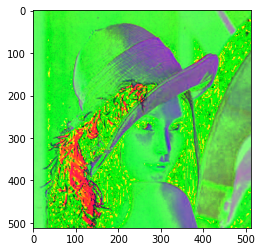

In [ ]:
import math
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation
        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        H = calc_hue(red, blue, green)
        S = calc_saturation(red, blue, green)
        I = calc_intensity(red, blue, green)
        return hsi, H, S, I
im2 = np.float32(cv2.imread("/content/Fig0646(a)(lenna_original_RGB).tif", cv2.IMREAD_COLOR))
hsi,H, S, I = RGB_TO_HSI(im2)
plt.imshow(hsi, cmap="gray")
plt.show()

[[92 92 93 ... 53 53 53]
 [93 92 94 ... 53 54 54]
 [93 93 95 ... 54 54 54]
 ...
 [81 86 97 ... 20 22 28]
 [80 88 86 ... 20 24 29]
 [80 88 89 ... 26 31 35]]


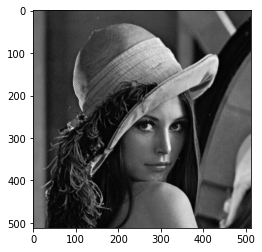

512
256


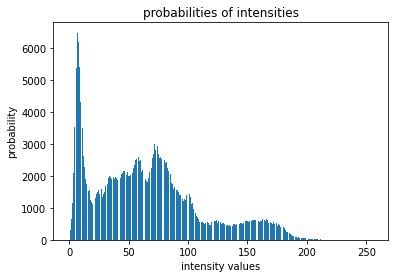

In [ ]:
def get_probability_list(matrix):
        input_probability_list = []
        sum_here = 0
        for i in range(256):
            sum_here += (matrix == i).sum()
            input_probability_list.append(((matrix == i).sum())/512*512)
        return input_probability_list
def plot_histogram(x_axis_list, y_axis_list, x_axis_name, y_axis_name, plot_name):
        plt.bar(x_axis_list, y_axis_list)
        plt.title(plot_name)
        plt.xlabel(x_axis_name)
        plt.ylabel(y_axis_name)
        plt.show()
def intensity(rgb_image_matrix):
    blue = rgb_image_matrix[:,:,0]
    green = rgb_image_matrix[:,:,1]
    red = rgb_image_matrix[:,:,2]
    return np.divide(blue + green + red, 3)
def show_grey_image(image_matrix):
    plt.imshow(image_matrix, cmap='gray')
    plt.show()
blue = im2[:,:,0]
green = im2[:,:,1]
red = im2[:,:,2]
trace = np.zeros((512,512))
for i in range(512):
    for j in range(512):
        trace[i][j] = (blue[i][j] + green[i][j] + red[i][j])/3
I = intensity(im2)
matrix = trace.astype("uint8")
print(matrix)
show_grey_image(matrix)
print(len(matrix))    
input_probability_list = get_probability_list(matrix)
print(len(input_probability_list))
#input_cdf_list = get_cdf_list(input_probability_list)
intensity_list = np.arange(0,256)
plot_histogram(intensity_list, input_probability_list, 'intensity values', 'probability', 'probabilities of intensities')

In [ ]:
print(len(blue))

512


256


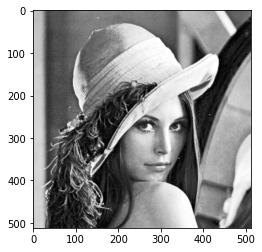

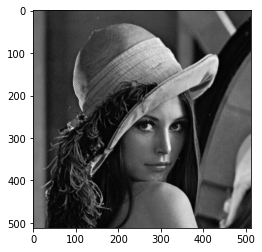

[[196.16821289 196.16821289 197.5358963  ... 110.95258713 110.95258713
  110.95258713]
 [197.5358963  196.16821289 198.89482498 ... 110.95258713 113.14321518
  113.14321518]
 [197.5358963  197.5358963  200.13216019 ... 113.14321518 113.14321518
  113.14321518]
 ...
 [176.45936966 186.85609818 202.54652023 ...  52.74335861  55.18398285
   63.80739212]
 [174.13547516 190.08270264 186.85609818 ...  52.74335861  58.03607941
   65.19453049]
 [174.13547516 190.08270264 191.67606354 ...  60.94654083  68.29565048
   75.75370789]]


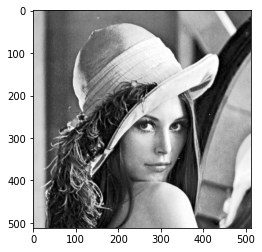

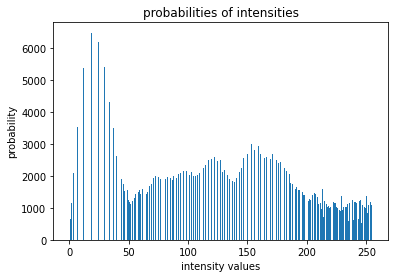

In [ ]:
def get_cdf_list(input_probability_list):
    input_cdf_list = []
    sum_iter = 0
    for i in range(256):
        sum_iter += input_probability_list[i]
        input_cdf_list.append(sum_iter)
    return input_cdf_list

input_cdf_list = get_cdf_list(input_probability_list)
print(len(input_cdf_list))
output_matrix = np.ones((512,512))* -1
for i in intensity_list:
    output_matrix = np.where(matrix == i, 255*input_cdf_list[i], output_matrix)     #for replacing intensity values with 255*F(r)
show_grey_image(output_matrix)

show_grey_image(matrix)
#plot_histogram(intensity_list, output_probability_list, 'intensity values', 'probability', 'probabilities of intensities')
output_matrix = output_matrix/(512*512)
print(output_matrix)
#output_matrix = (output_matrix/(512*512)).astype("uint8")
output_matrix = output_matrix.astype(np.uint8)
show_grey_image(output_matrix)
output_probability_list = get_probability_list(output_matrix)
plot_histogram(intensity_list, output_probability_list, 'intensity values', 'probability', 'probabilities of intensities')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


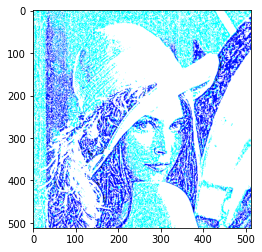

In [ ]:
def convert_to_rgb(h, s, i):
    r = 0
    g = 0
    b = 0
    if(0<=h<120):
	    b=i*(1-s)
	    w=(s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))
	    r=i*(1+w)
	    g=3*i - (r+b)

    if(120<=h<240):
	    h=h-120
	    r=i*(1-s)
	    w=(s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))
	    g=i*(1+w)
	    b=3*i - (r+g)

    if(240<=h<=360):
	    h=h-240
	    g=i*(1-s)
	    w=(s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))
	    b=i*(1+w)
	    r=3*i - (g+b)

    return(r,g,b)

final_rgb = np.zeros((512,512,3))
for i in range(512):
    for j in range(512):
        final_rgb[i][j][0],final_rgb[i][j][1],final_rgb[i][j][2] = convert_to_rgb(H[i][j], S[i][j], output_matrix[i][j])

final_rgb = cv2.cvtColor(final_rgb.astype('float32'), cv2.COLOR_RGB2BGR)
cv2.imwrite("rgb_im.png", final_rgb)
plt.imshow(final_rgb)
plt.show()